### Cluster of Customers :)

In [2]:
import numpy as np 
import pandas as pd

## Read & Cleaning the data

### Reading

In [3]:
cdf = pd.read_csv("Customer.csv")
cdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Cleaning

In [4]:
cdf['Gender'] = cdf['Gender'].replace('Female', '0')
cdf['Gender'] = cdf['Gender'].replace('Male', '1')
cdf['Gender'] = cdf['Gender'].astype('int')

In [5]:
cdf.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
print ("Shape of dataset before cleaning: ", cdf.shape)
cdf[[ 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]] = cdf[[ 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]].apply(pd.to_numeric, errors='coerce')
print ("Shape of dataset after cleaning: ", cdf.shape)

Shape of dataset before cleaning:  (200, 5)
Shape of dataset after cleaning:  (200, 5)


## Data Correlation

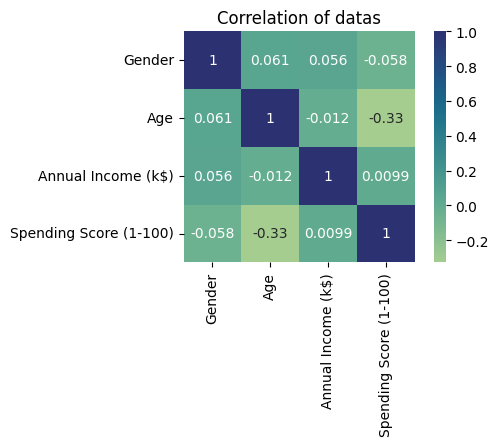

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
featuress = cdf[[ 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]]
correlation_matrix = featuress.corr()
plt.figure( figsize = ( 5, 3 ))
sns.heatmap( correlation_matrix, annot=True, cmap='crest', square=True )
plt.title( 'Correlation of datas' )
plt.show()

There is a very weak relationship between the elements of this matrix but Annoual Income & Spending Score have the most relations

This matrix also show that شge has the least relationship with income and spending money

## Fetch what I want

In [63]:
# x = cdf.values[ :, 1: 
x = cdf[[ 'Annual Income (k$)', 'Spending Score (1-100)' ]]
x = np.nan_to_num( x )

### stdScaler Normalizing

In [64]:
from sklearn.preprocessing import StandardScaler
std_features = StandardScaler().fit_transform( x )
std_features [ 0 : 5 ]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

### min max scalerNormalizing

In [65]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
feature_mms = min_max_scaler.fit_transform(x)
feature_mms [ 0 : 5 ]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918]])

## K - Means

In [66]:
from sklearn.cluster import KMeans
clusterNum = 5
k_means = KMeans( init = "k-means++", n_clusters = clusterNum, n_init = 12 )
k_means.fit( std_features )     # We can use std_features too
labels = k_means.labels_
print( labels )

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [67]:
cdf[ "Customer Types" ] = labels
cdf.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Customer Types,CustomerTypes
0,1,1,19,15,39,4,2
1,2,1,21,15,81,3,2
2,3,0,20,16,6,4,3
3,4,0,23,16,77,3,3
4,5,0,31,17,40,4,3


In [68]:
cdf.groupby('Customer Types').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),CustomerTypes
Customer Types,,,,,,
0,164.371429,0.542857,41.114286,88.200000,17.114286,1.200000
1,86.320988,0.407407,42.716049,55.296296,49.518519,3.185185
2,162.000000,0.461538,32.692308,86.538462,82.128205,0.051282
3,23.090909,0.409091,25.272727,25.727273,79.363636,2.636364
4,23.000000,0.391304,45.217391,26.304348,20.913043,2.608696


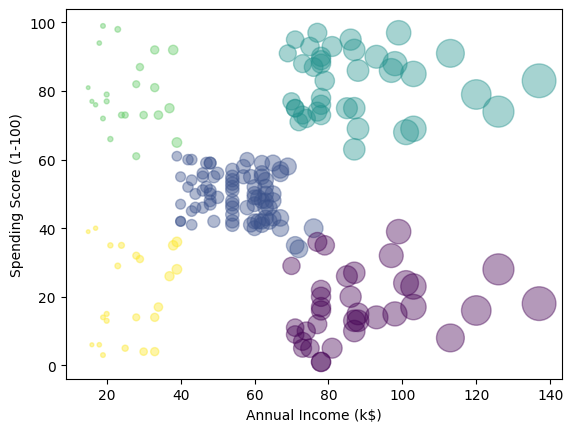

In [69]:
import matplotlib.pyplot as plt
area = np.pi * ( cdf[ 'Annual Income (k$)' ] )**2  / 100
plt.scatter( cdf[ 'Annual Income (k$)' ], cdf[ 'Spending Score (1-100)' ], s = area, c = labels.astype( np.float64 ), alpha = 0.4 )
plt.ylabel( 'Spending Score (1-100)', fontsize=10 )
plt.xlabel( 'Annual Income (k$)', fontsize=10 )

plt.show()

### Result of K - Means

    • Between 20 ~ 40  ( k$ ) : There are two groups of people, Someone decide to save more and spend lower but other group will spend

    • Between 40 ~ 75  ( k$ ) : The spending score is proven, I think people in this range, try to decrease their risk and save more

    • Between 75 ~ 140 ( k$ ) : again we have two groups of people!

---> I think it can be a real

## Hierarchical

In [130]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances( std_features, std_features ) 
print( dist_matrix )

[[0.         1.63050555 1.28167999 ... 4.44935328 4.72749573 4.96007568]
 [1.63050555 0.         2.91186723 ... 4.24551281 5.25987762 4.65731761]
 [1.28167999 2.91186723 0.         ... 4.95958139 4.64193658 5.50147501]
 ...
 [4.44935328 4.24551281 4.95958139 ... 0.         2.21418015 0.54622499]
 [4.72749573 5.25987762 4.64193658 ... 2.21418015 0.         2.52340145]
 [4.96007568 4.65731761 5.50147501 ... 0.54622499 2.52340145 0.        ]]


In [131]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
Z_using_dist_matrix = hierarchy.linkage( dist_matrix, 'ward' )

C:\Users\Enigma\AppData\Local\Temp\ipykernel_9224\2028900413.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage( dist_matrix, 'ward' )


In [132]:
agglom = AgglomerativeClustering( n_clusters = 5, linkage = 'ward')
agglom.fit( dist_matrix )

agglom.labels_

X:\Programing\Python\Environment\InstallerPack\Lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0])

In [133]:
cdf['CustomerTypes'] = agglom.labels_
cdf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Customer Types,CustomerTypes
0,1,1,19,15,39,4,1
1,2,1,21,15,81,3,4
2,3,0,20,16,6,4,1
3,4,0,23,16,77,3,4
4,5,0,31,17,40,4,1


Text(0, 0.5, 'Spending Score (1-100)')

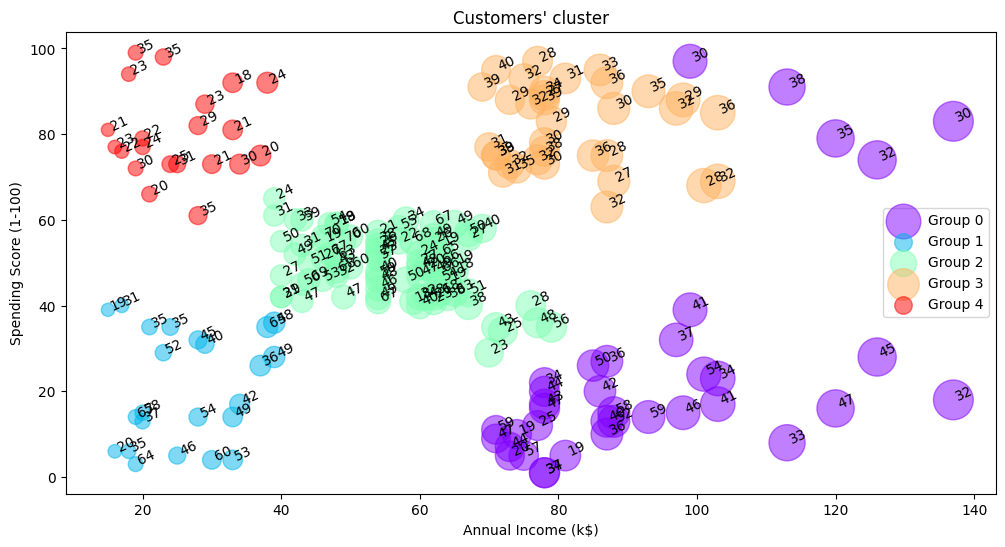

In [201]:
import matplotlib.cm as cm
n_clusters = max( agglom.labels_ )+1
colors = cm.rainbow( np.linspace( 0, 1, n_clusters ))
cluster_labels = list( range( 0, n_clusters ))

plt.figure( figsize = ( 12, 6 ))

cdf.rename( columns = { 'Annual Income (k$)' : 'income'}, inplace = True )
cdf.rename( columns = { 'Spending Score (1-100)' : 'spending'}, inplace = True )

for color, label in zip( colors, cluster_labels ):
    subset = cdf[ cdf.CustomerTypes == label ]
    for i in subset.index :
            plt.text( subset.income[ i ], subset.spending[ i ], subset.Age[ i ] , rotation = 25 ) 
    plt.scatter( subset.income, subset.spending, s = subset.income*6, color = color, label='Group ' + str( label ), alpha=0.5 )

plt.legend()
plt.title("Customers' cluster")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [136]:
cdf.rename( columns = { 'income' : 'Annual Income (k$)' }, inplace = True )
cdf.rename( columns = { 'spending' : 'Spending Score (1-100)' }, inplace = True )

agg_customers = cdf.groupby([ 'CustomerTypes', 'Gender' ])[[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)' ]].mean()
agg_customers

Age  Annual Income (k$)  Spending Score (1-100)
CustomerTypes Gender                                                       
0             0       42.875000           96.187500               28.687500
              1       37.666667           91.285714               22.095238
1             0       43.214286           27.357143               21.714286
              1       48.333333           24.666667               19.666667
2             0       40.509804           55.784314               48.647059
              1       45.441176           55.852941               49.852941
3             0       31.736842           82.842105               81.315789
              1       33.800000           80.400000               82.266667
4             0       25.583333           24.583333               81.833333
              1       25.000000           25.777778               77.666667

### Result of Hierarchy

The result is near to K-Means model

## DBSCAN

In [180]:
from sklearn.cluster import DBSCAN

db = DBSCAN( eps = 0.4, min_samples = 8 ).fit( std_features )   # also can use feature_mms instead but it gets worse

db_labels = db.labels_
db_labels[ 0 : 5 ]

array([-1,  0,  1,  0, -1])

In [181]:
core_samples_mask = np.zeros_like( db.labels_, dtype = bool )
core_samples_mask[ db.core_sample_indices_ ] = True
core_samples_mask[ 0 : 5 ]

array([False, False, False,  True, False])

In [182]:
n_clusters_ = len( set( db_labels )) - ( 1 if -1 in db_labels else 0 )
print( f'n_clusters_ :  {n_clusters_}' )
n_noise_ = list(labels).count(-1)
print( f'n_noise_ :  {n_noise_}')

n_clusters_ :  5
n_noise_ :  0


In [183]:
unique_labels = set( db_labels )
unique_labels

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)}

In [184]:
colors = plt.cm.Spectral( np.linspace( 0, 1, len( unique_labels )))

Text(0.5, 1.0, 'Estimated number of clusters : 5\nThe Blacks are noises')

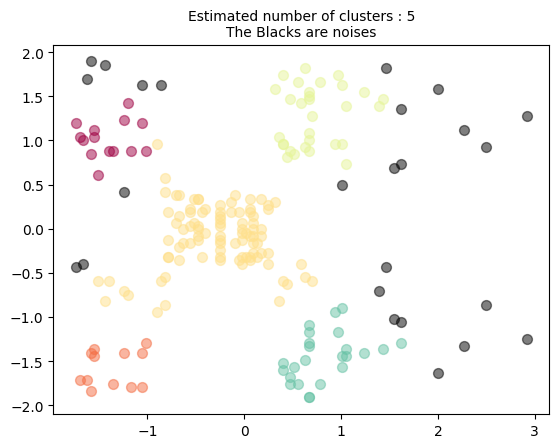

In [191]:
for k, col in zip( unique_labels, colors ):
    if k == -1 :
        col = 'k'
    
    class_member_mask = (db_labels == k)

    xy = std_features[ class_member_mask & core_samples_mask ]
    plt.scatter( xy[:, 0], xy[:, 1], s = 50, c = [ col ], marker = u'o', alpha = 0.5 )

    xy = std_features[ class_member_mask & ~core_samples_mask ]
    plt.scatter( xy[:, 0], xy[:, 1], s = 50, c = [ col ], marker = u'o', alpha = 0.5 )

plt.title( f"Estimated number of clusters : { n_clusters_ }\nThe Blacks are noises", fontsize = 10 )

### Result for DBSCAN

Again, we reached the model that we reached before, but this time the noises have also been identified

# Result of this question

K - Means is the best algorithm for finding a connection between datas in this question however other models can help us